# Import and Load Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import random
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Question or Insight
* What sorts of people were more likely to survive?
* Did people from p1 class were more highly to survive?
* What age of people were more highly to survive?

**Hypothesis**
* All female were more take precedence
* Family or related more higher to be survive
* Same cabin have more higher to survive, since 'maybe' they know each other [can't be used, because the data are very small, less than 50%]
* Age, maybe around optimal age are having more higher to survive

In [2]:
gender_data = pd.read_csv('../input/titanic/gender_submission.csv')
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

print('Setup Complete')

Setup Complete


# EDA (Exploratory Data Analysis)

## Read Data

* Survival | Survival | 0 = No, 1 = Yes
* Pclass | Ticket class | 1 = Upper, 2 = Middle, 3 = Lower | *A proxy for socio-economic status (SES)*
* Sex | Sex
* Age |Age in years | *Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5*
* Sibsp | siblings / spouses aboard the Titanic | *The dataset defines family relations in this way...*
> * Sibling = brother, sister, stepbrother, stepsister
> * Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch | parents / children aboard the Titanic | *The dataset defines family relations in this way...*
> * Parent = mother, father
> * Child = daughter, son, stepdaughter, stepson
> * Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket | Ticket number
* Fare | Passenger fare
* Cabin | Cabin number
* Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)

gender_data

,PassengerId,Survived
0,892,0
1,893,1
...,...,...
416,1308,0
417,1309,0


In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Data Description

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
print(train_data.info(verbose=True),'\n','-'*50, '\n','-'*50)
train_desc = pd.DataFrame()
train_desc['isna'] = train_data.isna().sum()
train_desc['nunique'] = train_data.nunique()

print(train_desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 
 -------------------------------------------------- 
 --------------------------------------------------
             isna  nunique
PassengerId     0      891
Survived        0        2
Pclass          0        3
Name            0      89

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print(test_data.info(verbose=True),'\n','-'*50, '\n','-'*50)
test_desc = pd.DataFrame()
test_desc['isna'] = test_data.isna().sum()
test_desc['nunique'] = test_data.nunique()

print(test_desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None 
 -------------------------------------------------- 
 --------------------------------------------------
             isna  nunique
PassengerId     0      418
Pclass          0        3
Name            0      418
Sex             0        2
Age            86       79
SibSp        

In [10]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
pd.set_option('display.max_rows', 10)

# Data Wrangle

**Analyze each features**

Since hypothesis said that people who are have higher survive is because they are having differences of Pclass, Sex, SibSp, Parch, and Age

In [12]:
def labelvalue(graph, data, rotationticklabels=0):
    for p in graph.patches:
        graph.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', 
                       va = 'center', xytext = (0, 5), textcoords = 'offset points')
        graph.annotate(('{:.2f}%'.format(p.get_height()/(data.value_counts().sum())*100)), 
                       (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center',
                       va = 'center', xytext = (0, 20), textcoords = 'offset points')
        graph.set_xticklabels(graph.get_xticklabels(), rotation=rotationticklabels)

## Drop Column and DropNA 1

In [13]:
train_data = train_data.drop(columns=['Cabin', 'Ticket'])
test_data = test_data.drop(columns=['Cabin', 'Ticket'])

# Only drop NA value in train data, to make predict more accurate
train_data = train_data.dropna() 

## Survived

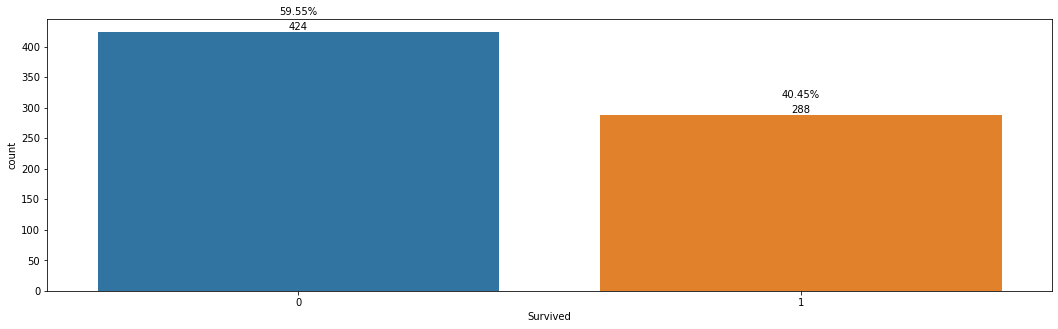

In [14]:
fig, ax = plt.subplots(figsize=(18, 5))

graph = sns.countplot(x=train_data['Survived'])
labelvalue(graph, train_data['Survived'])

## Pclass

In [15]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


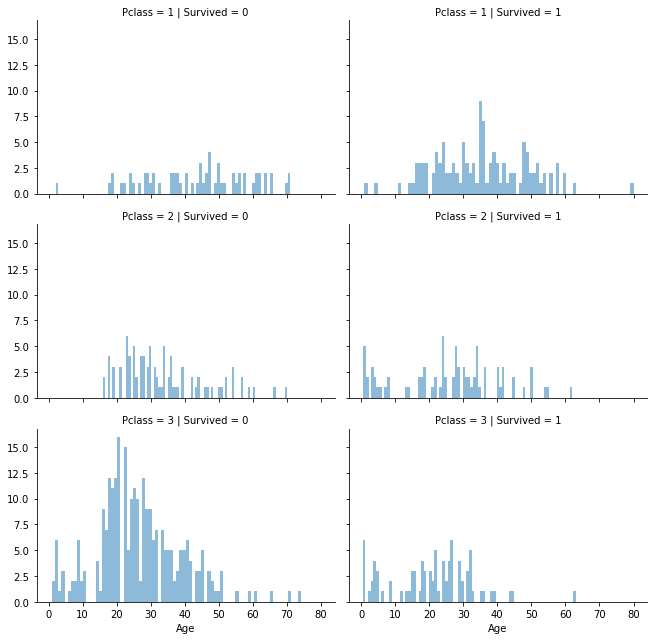

In [16]:
PclassFig = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=3, aspect=1.5)
PclassFig.map(plt.hist, 'Age', alpha=0.5, bins=80)
PclassFig.add_legend()

## Sex

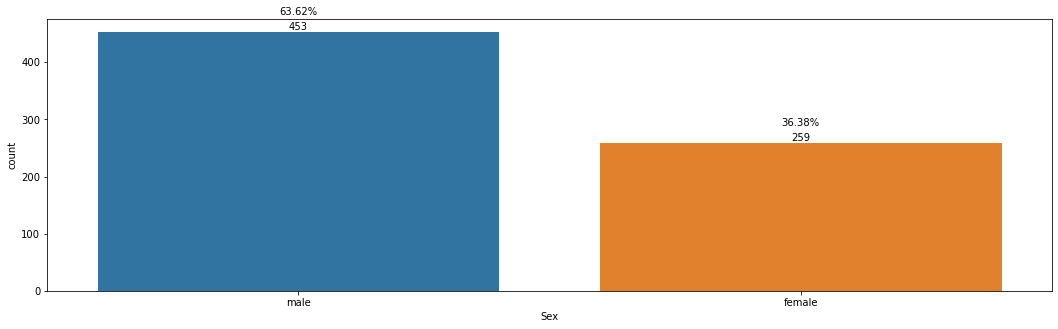

In [17]:
fig, ax = plt.subplots(figsize=(18, 5))

graph = sns.countplot(x=train_data['Sex'])
graph.set_xticklabels(graph.get_xticklabels())
labelvalue(graph, train_data['Sex'])

In [18]:
ssurvived = train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
ssurvived['NotSurvived'] = 1 - ssurvived['Survived']
ssurvived

,Sex,Survived,NotSurvived
0,female,0.752896,0.247104
1,male,0.205298,0.794702


In [19]:
combine = [train_data, test_data]

for dataset in combine:
    for interval in range(0, 1):
        dataset['Sex'] = dataset['Sex'].replace({'male':0, 'female':1}).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


## Age

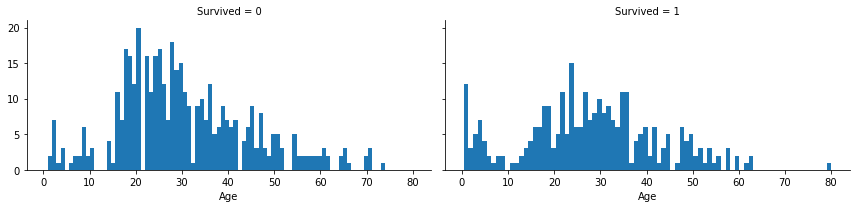

In [20]:
AgeFig = sns.FacetGrid(train_data, col='Survived', height=3, aspect=2)
AgeFig.map(plt.hist, 'Age', bins=80) # because the max value of the Age is 80, so it's divided into 80 bars

In [21]:
guess_age = np.zeros((2,3))

combine = [train_data, test_data]

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex'] == i) & \
                                 (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_data.median()
            
            guess_age[i, j] = int(age_guess/0.5 + 0.5) * 0.5
    
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & \
                        (dataset.Pclass == j+1), 'Age'] = guess_age[i, j]
    
    dataset['Age'] = dataset['Age'].astype(int)

In [22]:
for dataset in combine:
    for interval in range(0, 16):
        dataset.loc[(dataset['Age'] > (interval * 5)) & (dataset['Age'] <= ((interval + 1) * 5)),'Age'] = interval
        dataset['Age'] = dataset['Age'].astype(int)

AgeBand = train_data[['Age', 'Survived']].groupby(['Age']).mean().sort_values(by = 'Age', ascending = True)
AgeBand

,Survived
Age,
0,0.704545
1,0.350000
2,0.578947
3,0.340206
4,0.347107
...,...
11,0.411765
12,0.230769
13,0.000000


## Title
title of social strata makes the people have more chance to survived, for the higher person strata

In [23]:
combine = [train_data, test_data]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], test_data['Sex'])

Sex,0,1
Title,,
Don,1,0
Dr,3,0
Master,14,6
Miss,48,30
Mme,1,0
Mr,113,68
Mrs,32,15
Rev,1,2


In [24]:
train_data['Title'].value_counts()

Mr        398
Miss      145
Mrs       107
Master     36
Rev         6
         ... 
Don         1
Mme         1
Sir         1
Capt        1
Ms          1
Name: Title, Length: 17, dtype: int64

In [25]:
combine = [train_data, test_data]

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt',\
                                                                'Don','Dr','Major','Rev','Col',\
                                                                'Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_data[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.583333
1,Miss,0.722973
2,Mr,0.168342
3,Mrs,0.787037
4,Rare,0.363636


In [26]:
combine = [train_data, test_data]

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace({'Mr':'1', 'Miss':'2', 'Mrs':'3', 'Master':'4', 'Rare':'5'}).astype(int).fillna(0)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,4,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,7,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,5,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,6,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,6,0,0,8.0500,S,1


## Embarked

In [27]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.607692
2,S,0.362816
1,Q,0.285714


In [28]:
combine = [train_data, test_data]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].replace({'S':0, 'C':1, 'Q':2})
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,4,1,0,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,7,1,0,71.2833,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,5,0,0,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,6,1,0,53.1000,0,3
4,5,0,3,"Allen, Mr. William Henry",0,6,0,0,8.0500,0,1


## FamilySize (New Feature)

Create new feature combined of Parch and SibSp feature, this new feature is because the reason from closed family have a highly survived to look each other

In [29]:
combine = [train_data, test_data]

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by = 'FamilySize')

,Survived
FamilySize,
1,0.318408
2,0.546763
3,0.569892
4,0.777778
5,0.272727
6,0.136364
7,0.333333
8,0.000000


## Went Alone (New Feature)
And create feature for someone who went to ship alone

In [30]:
train_data['IsAlone'] = 0
test_data['IsAlone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1
test_data.loc[test_data['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.516129
1,1,0.318408


# Last Drop values
Drop some features that are from new features

In [31]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,4,1,0,7.2500,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,7,1,0,71.2833,1,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,5,0,0,7.9250,0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,6,1,0,53.1000,0,3,2,0
4,5,0,3,"Allen, Mr. William Henry",0,6,0,0,8.0500,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,7,0,5,29.1250,2,3,6,0
886,887,0,2,"Montvila, Rev. Juozas",0,5,0,0,13.0000,0,5,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,3,0,0,30.0000,0,2,1,1
889,890,1,1,"Behr, Mr. Karl Howell",0,5,0,0,30.0000,1,1,1,1


In [32]:
pd.set_option('display.max_rows', None)
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
FamilySize     0
IsAlone        0
dtype: int64

In [33]:
train_data = train_data.drop(['Name', 'PassengerId', 'Fare', 'SibSp', 'Parch', 'FamilySize'], axis=1).reset_index(drop=True)
test_data_raw = test_data.drop(['Name', 'Fare', 'SibSp', 'Parch', 'FamilySize'], axis=1).reset_index(drop=True)
test_data = test_data.drop(['Name', 'PassengerId', 'Fare', 'SibSp', 'Parch', 'FamilySize'], axis=1).reset_index(drop=True)
train_data = train_data.astype(int)
test_data = test_data.astype(int)

train_data.shape, test_data.shape

((712, 7), (418, 6))

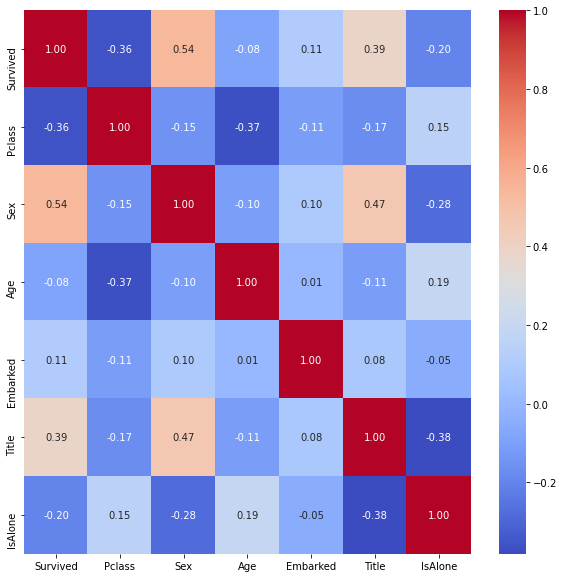

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Convert feature with LabelEncoding

In [35]:
low_cardinality_cols = ['Pclass', 'Embarked', 'Title']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
New_Columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_S', 'Embarked_C', 'Embarked_Q',
               'Title_Mr', 'Title_Miss', 'Title_Mrs', 'Title_Master', 'Title_Rare']

new_data_train = pd.DataFrame(OH_encoder.fit_transform(train_data[low_cardinality_cols]))
new_data_train.columns = New_Columns
train_data = pd.concat([train_data, new_data_train], axis=1)
train_data = train_data.drop(['Pclass', 'Embarked', 'Title'], axis=1)

new_data_test = pd.DataFrame(OH_encoder.fit_transform(test_data[low_cardinality_cols]))
new_data_test.columns = New_Columns
test_data = pd.concat([test_data, new_data_test], axis=1)
test_data = test_data.drop(['Pclass', 'Embarked', 'Title'], axis=1)

train_data.head()

,Survived,Sex,Age,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_S,Embarked_C,Embarked_Q,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare
0,0,0,4,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,7,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,5,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,6,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,6,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
train_data.shape

(712, 15)

# Model, Predict, and Solve


## Dataset Identify

In [37]:
X_train = train_data.drop('Survived', axis = 1)
Y_train = train_data['Survived']
X_test = test_data

print(X_train.shape, Y_train.shape, X_test.shape)

(712, 14) (712,) (418, 14)


## Normalization

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train,"\n\n=======================================\n\n", X_test)

[[-0.75613751 -0.45865498 -1.13875994 ... -0.42285689 -0.23076923
  -0.17856108]
 [ 1.32251077  0.58578749 -1.13875994 ...  2.36486629 -0.23076923
  -0.17856108]
 [ 1.32251077 -0.11050749  0.87814821 ... -0.42285689 -0.23076923
  -0.17856108]
 ...
 [ 1.32251077 -0.80680246  0.87814821 ... -0.42285689 -0.23076923
  -0.17856108]
 [-0.75613751 -0.11050749  0.87814821 ... -0.42285689 -0.23076923
  -0.17856108]
 [-0.75613751  0.23764     0.87814821 ... -0.42285689 -0.23076923
  -0.17856108]] 


 [[-0.75592895  0.28978917  0.80757285 ... -0.45617155 -0.22999288
  -0.1206777 ]
 [ 1.32287566  1.45451872 -1.23827837 ...  2.19215774 -0.22999288
  -0.1206777 ]
 [-0.75592895  2.61924827  0.80757285 ... -0.45617155 -0.22999288
  -0.1206777 ]
 ...
 [-0.75592895  0.67803235  0.80757285 ... -0.45617155 -0.22999288
  -0.1206777 ]
 [-0.75592895 -0.4866972   0.80757285 ... -0.45617155 -0.22999288
  -0.1206777 ]
 [-0.75592895 -0.4866972  -1.23827837 ... -0.45617155  4.34796066
  -0.1206777 ]]


## Seed

In [39]:
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ["PYTHONHASHSEED"] = str(seed_value)

SEED = 25
set_seed(SEED)

## Train the Data
List of train model
* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

### Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_logreg_ori = logreg.predict(X_test)

acc_logreg_ori = round(logreg.score(X_train, Y_train), 4)
print("acc logreg =", acc_logreg_ori)

acc logreg = 0.8202


### Support Vector Machines (SVM)

In [41]:
svm = SVC()
svm.fit(X_train, Y_train)
Y_pred_svm_ori = svm.predict(X_test)

acc_svm_ori = round(svm.score(X_train, Y_train), 4)
print("acc svm =", acc_svm_ori)

acc svm = 0.8244


### k-Nearest Neighbors (KNN) Classifier

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn_ori = knn.predict(X_test)

acc_knn_ori = round(knn.score(X_train, Y_train), 4)
print("acc knn =", acc_knn_ori)

acc knn = 0.8455


In [43]:
parameters = {'n_neighbors':[15, 17, 19], 'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':[250, 275, 300]}
knn = KNeighborsClassifier()
knn = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')
knn.fit(X_train, Y_train)
Y_pred_knn_best = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train), 4)
print("acc knn =", acc_knn)

print('-----')
print(f'Best parameters {knn.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{knn.best_score_:.3f}'
)
best_score_knn = knn.best_score_
print('-----')

acc knn = 0.8104
-----
Best parameters {'algorithm': 'auto', 'leaf_size': 300, 'n_neighbors': 19, 'weights': 'uniform'}
Mean cross-validated accuracy score of the best_estimator: 0.785
-----


### Gaussian Naive Bayes

In [44]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_gaus_ori = gaussian.predict(X_test)

acc_gaussian_ori = round(gaussian.score(X_train, Y_train), 4)
print("acc gaussian =", acc_gaussian_ori)

acc gaussian = 0.7837


### Perceptron

In [45]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred_per_ori = perceptron.predict(X_test)

acc_perceptron_ori = round(perceptron.score(X_train, Y_train), 4)
print("acc perceptron =", acc_perceptron_ori)

acc perceptron = 0.7865


### Linear SVC

In [46]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred_svc_ori = linear_svc.predict(X_test)

acc_linear_svc_ori = round(linear_svc.score(X_train, Y_train), 4)
print("acc linear_svc =", acc_linear_svc_ori)

acc linear_svc = 0.809


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Stochastic Gradient Descent

In [47]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred_sgd_ori = sgd.predict(X_test)

acc_sgd_ori = round(sgd.score(X_train, Y_train), 4)
print("acc sgd =", acc_sgd_ori)

acc sgd = 0.743


### Decision Tree

In [48]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dectree_ori = decision_tree.predict(X_test)

acc_decision_tree_ori = round(decision_tree.score(X_train, Y_train), 4)
print("acc decision_tree =", acc_decision_tree_ori)

acc decision_tree = 0.868


In [49]:
parameters = {'max_depth':[15, 17, 19, 21], 'max_features':['auto', 'sqrt'],
              'criterion':['gini', 'entropy']}
decision_tree = DecisionTreeClassifier(random_state=SEED)
decision_tree = GridSearchCV(decision_tree, parameters, cv=5, scoring='accuracy')
decision_tree.fit(X_train, Y_train)
Y_pred_dectree_best = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train), 4)
print("acc decision_tree =", acc_decision_tree)

print('-----')
print(f'Best parameters {decision_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{decision_tree.best_score_:.3f}'
)
best_score_decision_tree = decision_tree.best_score_
print('-----')

acc decision_tree = 0.868
-----
Best parameters {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
Mean cross-validated accuracy score of the best_estimator: 0.760
-----


### Random Forest

In [51]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred_rf_ori = random_forest.predict(X_test)

acc_random_forest_ori = round(random_forest.score(X_train, Y_train), 4)
print("acc random_forest =", acc_random_forest_ori)

acc random_forest = 0.868


In [52]:
parameters = {'max_depth':[11, 13, 15], 'n_estimators':[300, 500],
              'max_features':['auto', 'sqrt'], 'criterion':['gini', 'entropy']}
random_forest = RandomForestClassifier(random_state=SEED)
random_forest = GridSearchCV(random_forest, parameters, cv=5, scoring='accuracy')
random_forest.fit(X_train, Y_train)
Y_pred_rf_best = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train), 4)
print("acc random_forest =", acc_random_forest)

print('-----')
print(f'Best parameters {random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{random_forest.best_score_:.3f}'
)
best_score_random_forest = random_forest.best_score_
print('-----')

acc random_forest = 0.868
-----
Best parameters {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 300}
Mean cross-validated accuracy score of the best_estimator: 0.773
-----


### XGBoost

In [54]:
import xgboost

xgboost = xgboost.XGBClassifier()
xgboost.fit(X_train, Y_train)
Y_pred_xgb_ori = xgboost.predict(X_test)

acc_xgboost_ori = round(xgboost.score(X_train, Y_train), 4)
print("acc xgboost =", acc_xgboost_ori)

acc xgboost = 0.861


In [55]:
import xgboost

parameters = {'max_depth':[15, 17, 19], 'n_estimators':[250, 300, 500, 750, 1000],
              'learning_rate':[0.01]}
xgboost = xgboost.XGBClassifier(random_state=SEED)
xgboost = GridSearchCV(xgboost, parameters, cv=5, scoring='accuracy')
xgboost.fit(X_train, Y_train)
Y_pred_xgb_best = xgboost.predict(X_test)

acc_xgboost = round(xgboost.score(X_train, Y_train), 4)
print("acc xgboost =", acc_xgboost)

print('-----')
print(f'Best parameters {xgboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{xgboost.best_score_:.3f}'
)
best_score_xgboost = xgboost.best_score_
print('-----')

acc xgboost = 0.8567
-----
Best parameters {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 750}
Mean cross-validated accuracy score of the best_estimator: 0.778
-----


### AdaBoost

In [56]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, Y_train)
Y_pred_ada_ori = adaboost.predict(X_test)

acc_adaboost_ori = round(adaboost.score(X_train, Y_train), 4)
print("acc adaboost =", acc_adaboost_ori)

acc adaboost = 0.816


In [57]:
parameters = {'n_estimators':[300, 400, 500, 750, 1000],
              'learning_rate':[0.01]}
adaboost = AdaBoostClassifier(random_state=SEED)
adaboost = GridSearchCV(adaboost, parameters, cv=5, scoring='accuracy')
adaboost.fit(X_train, Y_train)
Y_pred_ada_best = adaboost.predict(X_test)

acc_adaboost = round(adaboost.score(X_train, Y_train), 4)
print("acc adaboost =", acc_adaboost)

print('-----')
print(f'Best parameters {adaboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{adaboost.best_score_:.3f}'
)
best_score_adaboost = adaboost.best_score_
print('-----')

acc adaboost = 0.7949
-----
Best parameters {'learning_rate': 0.01, 'n_estimators': 750}
Mean cross-validated accuracy score of the best_estimator: 0.791
-----


### CatBoost

In [58]:
import catboost

catboost = catboost.CatBoostClassifier(verbose=False)
catboost.fit(X_train, Y_train)
Y_pred_cat_ori = catboost.predict(X_test)

acc_catboost_ori = round(catboost.score(X_train, Y_train), 4)
print("acc catboost =", acc_catboost_ori)

acc catboost = 0.8567


In [59]:
import catboost

parameters = {'iterations':[1000, 1100],
              'learning_rate':[0.01],
              'depth':[9, 11, 13]}
catboost = catboost.CatBoostClassifier(verbose=False)
catboost = GridSearchCV(catboost, parameters, cv=5, scoring='accuracy')
catboost.fit(X_train, Y_train)
Y_pred_cat_best = catboost.predict(X_test)

acc_catboost = round(catboost.score(X_train, Y_train), 4)
print("acc catboost =", acc_catboost)

print('-----')
print(f'Best parameters {catboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{catboost.best_score_:.3f}'
)
best_score_catboost = catboost.best_score_
print('-----')

acc catboost = 0.8666
-----
Best parameters {'depth': 9, 'iterations': 1100, 'learning_rate': 0.01}
Mean cross-validated accuracy score of the best_estimator: 0.780
-----


### LightGBM

In [60]:
import lightgbm

lightgbm = lightgbm.LGBMClassifier()
lightgbm.fit(X_train, Y_train)
Y_pred_lgbm_ori = lightgbm.predict(X_test)

acc_lightgbm_ori = round(lightgbm.score(X_train, Y_train), 4)
print("acc lightgbm =", acc_lightgbm_ori)

acc lightgbm = 0.8497


In [61]:
import lightgbm

parameters = {'n_estimators':[500, 625, 750, 875, 1000],
              'learning_rate':[0.01],
              'num_leaves':[25, 30, 35]}
lightgbm = lightgbm.LGBMClassifier()
lightgbm = GridSearchCV(lightgbm, parameters, cv=5, scoring='accuracy')
lightgbm.fit(X_train, Y_train)
Y_pred_lgbm_best = lightgbm.predict(X_test)

acc_lightgbm = round(lightgbm.score(X_train, Y_train), 4)
print("acc lightgbm =", acc_lightgbm)

print('-----')
print(f'Best parameters {lightgbm.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{lightgbm.best_score_:.3f}'
)
best_score_lightgbm = lightgbm.best_score_
print('-----')

acc lightgbm = 0.8469
-----
Best parameters {'learning_rate': 0.01, 'n_estimators': 625, 'num_leaves': 25}
Mean cross-validated accuracy score of the best_estimator: 0.785
-----


# Model Evaluation

In [62]:
model_eval = pd.DataFrame({'Model' : ['Logistic Regression', 'SVM', 'KNN', 'Gaussian Naive Bayes', 'Perceptron', 
                                      'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest',
                                      'XGBoost', 'AdaBoost', 'CatBoost', 'LightGBM'],
                           'Accuracy Ori' : [acc_logreg_ori, acc_svm_ori, acc_knn_ori, acc_gaussian_ori, acc_perceptron_ori, 
                                             acc_linear_svc_ori, acc_sgd_ori, acc_decision_tree_ori, acc_random_forest_ori,
                                             acc_xgboost_ori, acc_adaboost_ori, acc_catboost_ori, acc_lightgbm_ori],
                           'Accuracy Best' : [0, 0, acc_knn, 0, 0, 
                                              0, 0, acc_decision_tree, acc_random_forest,
                                              acc_xgboost, acc_adaboost, acc_catboost, acc_lightgbm],
                           'Grid Search CV Value' : [0, 0, best_score_knn, 0, 0,
                                                     0, 0, best_score_decision_tree, best_score_random_forest,
                                                     best_score_xgboost, best_score_adaboost, best_score_catboost, best_score_lightgbm]})

model_eval.sort_values(by = ['Grid Search CV Value'], ascending = False)

,Model,Accuracy Ori,Accuracy Best,Grid Search CV Value
10,AdaBoost,0.8160,0.7949,0.790663
12,LightGBM,0.8497,0.8469,0.785157
2,KNN,0.8455,0.8104,0.785137
11,CatBoost,0.8567,0.8666,0.779523
9,XGBoost,0.8610,0.8567,0.778135
8,Random Forest,0.8680,0.8680,0.772501
7,Decision Tree,0.8680,0.8680,0.759854
0,Logistic Regression,0.8202,0.0000,0.000000
1,SVM,0.8244,0.0000,0.000000
3,Gaussian Naive Bayes,0.7837,0.0000,0.000000


# Submission

In [63]:
submission_logreg_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_logreg_ori})
submission_logreg_ori.to_csv('submission_logreg_ori.csv', index=False)

submission_svm_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_svm_ori})
submission_svm_ori.to_csv('submission_svm_ori.csv', index=False)

submission_knn_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_knn_ori})
submission_knn_ori.to_csv('submission_knn_ori.csv', index=False)

submission_gaus_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_gaus_ori})
submission_gaus_ori.to_csv('submission_gaus_ori.csv', index=False)

submission_per_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_per_ori})
submission_per_ori.to_csv('submission_per_ori.csv', index=False)

submission_svc_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_svc_ori})
submission_svc_ori.to_csv('submission_svc_ori.csv', index=False)

submission_sgd_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_sgd_ori})
submission_sgd_ori.to_csv('submission_sgd_ori.csv', index=False)

submission_dectree_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_dectree_ori})
submission_dectree_ori.to_csv('submission_dectree_ori.csv', index=False)

submission_rf_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_rf_ori})
submission_rf_ori.to_csv('submission_rf_ori.csv', index=False)

submission_dec_tree = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_xgb_ori})
submission_dec_tree.to_csv('submission_dec_tree.csv', index=False)

submission_xgb_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_ada_ori})
submission_xgb_ori.to_csv('submission_xgb_ori.csv', index=False)

submission_cat_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_cat_ori})
submission_cat_ori.to_csv('submission_cat_ori.csv', index=False)

submission_lgbm_ori = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_lgbm_ori})
submission_lgbm_ori.to_csv('submission_lgbm_ori.csv', index=False)

In [72]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=300, 
                           n_neighbors=19, weights='uniform')
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train), 4)
print("acc knn =", acc_knn)

#acc knn = 0.8104
#Best parameters {'algorithm': 'auto', 'leaf_size': 300, 'n_neighbors': 19, 'weights': 'uniform'}
#Mean cross-validated accuracy score of the best_estimator: 0.785

submission_knn = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_knn})
submission_knn.to_csv('submission_knn.csv', index=False)

import pickle
knn = 'knn_model.sav'
pickle.dump(knn, open(knn, 'wb'))

acc knn = 0.8104


In [73]:
decision_tree = DecisionTreeClassifier(max_depth=15, max_features='auto',
                                       criterion='gini')
decision_tree.fit(X_train, Y_train)
Y_pred_dec_tree = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train), 4)
print("acc dec tree =", acc_decision_tree)

#acc decision_tree = 0.868
#Best parameters {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
#Mean cross-validated accuracy score of the best_estimator: 0.760

submission_dec_tree = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_dec_tree})
submission_dec_tree.to_csv('submission_dec_tree.csv', index=False)

import pickle
dec_tree = 'dec_tree_model.sav'
pickle.dump(decision_tree, open(dec_tree, 'wb'))
  
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

acc dec tree = 0.868


In [74]:
random_forest = RandomForestClassifier(criterion='gini', max_depth=11, max_features= 'auto', n_estimators= 300)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train), 4)
print("acc random_forest =", acc_random_forest)

#acc random_forest = 0.868
#Best parameters {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 300}
#Mean cross-validated accuracy score of the best_estimator: 0.773

submission_rf = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_rf})
submission_rf.to_csv('submission_rf.csv', index=False)

rf = 'rf_model.sav'
pickle.dump(random_forest, open(rf, 'wb'))

acc random_forest = 0.868


In [75]:
import xgboost
xgboost = xgboost.XGBClassifier(learning_rate= 0.01, max_depth=15, n_estimators=750)
xgboost.fit(X_train, Y_train)
Y_pred_xgboost = xgboost.predict(X_test)

acc_xgboost = round(xgboost.score(X_train, Y_train), 4)
print("acc xgboost =", acc_xgboost)

#acc xgboost = 0.8567
#Best parameters {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 750}
#Mean cross-validated accuracy score of the best_estimator: 0.778

submission_xgboost = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_xgboost})
submission_xgboost.to_csv('submission_xgboost.csv', index=False)

pickle.dump(xgboost, open("xgboost.dat", "wb"))

acc xgboost = 0.8567


In [76]:
adaboost = AdaBoostClassifier(learning_rate=0.01, n_estimators=750)
adaboost.fit(X_train, Y_train)
Y_pred_adaboost = adaboost.predict(X_test)

acc_adaboost = round(adaboost.score(X_train, Y_train), 4)
print("acc adaboost =", acc_adaboost)

#acc adaboost = 0.7949
#Best parameters {'learning_rate': 0.01, 'n_estimators': 750}
#Mean cross-validated accuracy score of the best_estimator: 0.791

submission_adaboost = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_adaboost})
submission_adaboost.to_csv('submission_adaboost.csv', index=False)

pickle.dump(adaboost, open("adaboost.dat", "wb"))

acc adaboost = 0.7949


In [77]:
import catboost

catboost = catboost.CatBoostClassifier(verbose=False, depth=9, iterations=1100, learning_rate=0.01)
catboost.fit(X_train, Y_train)
Y_pred_catboost = catboost.predict(X_test)

acc_catboost = round(catboost.score(X_train, Y_train), 4)
print("acc catboost =", acc_catboost)

#acc catboost = 0.8666
#Best parameters {'depth': 9, 'iterations': 1100, 'learning_rate': 0.01}
#Mean cross-validated accuracy score of the best_estimator: 0.780

submission_catboost = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_catboost})
submission_catboost.to_csv('submission_catboost.csv', index=False)

pickle.dump(catboost, open("catboost.dat", "wb"))

acc catboost = 0.8666


In [78]:
import lightgbm

lightgbm = lightgbm.LGBMClassifier(learning_rate=0.01, n_estimators=625, num_leaves=25)
lightgbm.fit(X_train, Y_train)
Y_pred_lgbm = lightgbm.predict(X_test)

acc_lightgbm = round(lightgbm.score(X_train, Y_train), 4)
print("acc lightgbm =", acc_lightgbm)

#acc lightgbm = 0.8469
#Best parameters {'learning_rate': 0.01, 'n_estimators': 625, 'num_leaves': 25}
#Mean cross-validated accuracy score of the best_estimator: 0.785

submission_lgbm = pd.DataFrame({'PassengerId': test_data_raw['PassengerId'], 'Survived':Y_pred_lgbm})
submission_lgbm.to_csv('submission_lgbm.csv', index=False)

pickle.dump(lightgbm, open("lightgbm.dat", "wb"))

acc lightgbm = 0.8469


In [79]:
pd.set_option('display.max_rows', 5)

subs = pd.read_csv('./submission_dec_tree.csv')
subs

,PassengerId,Survived
0,892,0
1,893,0
...,...,...
416,1308,0
417,1309,1


# Additional Section to look Correlation

## Permutation Importance

In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X_train, Y_train, random_state=1)
my_model = DecisionTreeClassifier(max_depth=5, max_features='auto',
                                  criterion='gini').fit(X_train, Y_train)

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

**Note**

Still hasn't done yet, need more study to make better accuracy, so I submit everything and let submission choose which one that have better accuracy :)